In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import groupby
from IPython.display import display
import os

# Descripcion de los datos:
# head movies.csv:
"""
    movieId,title,genres
    1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
    2,Jumanji (1995),Adventure|Children|Fantasy
    3,Grumpier Old Men (1995),Comedy|Romance
    4,Waiting to Exhale (1995),Comedy|Drama|Romance
    5,Father of the Bride Part II (1995),Comedy
    6,Heat (1995),Action|Crime|Thriller
    7,Sabrina (1995),Comedy|Romance
    8,Tom and Huck (1995),Adventure|Children
    9,Sudden Death (1995),Action
"""

# head ratings.csv
"""
    userId,movieId,rating,timestamp
    1,2,3.5,1112486027
    1,29,3.5,1112484676
    1,32,3.5,1112484819
    1,47,3.5,1112484727
    1,50,3.5,1112484580
    1,112,3.5,1094785740
    1,151,4.0,1094785734
    1,223,4.0,1112485573
    1,253,4.0,1112484940
"""

# descarga de datos
# wget http://files.grouplens.org/datasets/movielens/ml-20m.zip
# unzip ml-20m.zip

data_folder = '/media/hudson/Elements/data/DiploDatos-aprendizaje-no-supervizado/ml-20m'
movies_path = os.path.join(data_folder, 'movies.csv')
ratings_path = os.path.join(data_folder, 'ratings.csv')

def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
movies = pd.read_csv(movies_path)
print('movies -- dimensions: {0};   size: {1}'.format(movies.shape, size(movies)))
display(movies.head())

movies -- dimensions: (27278, 3);   size: 4.50 MB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
import matplotlib.pyplot as plt
movies['splitted_genres'] = movies['genres'].str.split('|', n=0, expand=False)
display(movies.head())
# generos = movies['splitted_genres'].unique()
count_by_genre = movies['splitted_genres'].apply(pd.Series).stack().value_counts()
display(count_by_genre)
count_by_genre.plot.bar(figsize=(16, 4))

,movieId,title,genres,splitted_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
dtype: int64

In [4]:
# Obtener los dummies sobre un campo que tiene listas dentro
# https://stackoverflow.com/questions/47026585/unhashable-type-list-error-with-get-dumies
# pd.get_dummies(df.categories.apply(pd.Series).stack()).sum(level=0)

dummy_genres = pd.get_dummies(movies['splitted_genres'].apply(pd.Series).stack()).sum(level=0)
movies_with_dummies_genres = pd.concat([movies, dummy_genres], axis=1)
# se quitan las dos ultimas categorías que tiene pocas películas
movies_cleaned = movies_with_dummies_genres.drop(columns=['genres', 'splitted_genres', 'IMAX','(no genres listed)'])
display(movies_cleaned.head())

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
ratings = pd.read_csv(ratings_path, usecols = ['userId', 'movieId', 'rating'])
print('ratings -- dimensions: {0};   size: {1}'.format(ratings.shape, size(ratings)))
display(ratings.head())

ratings -- dimensions: (20000263, 3);   size: 480.01 MB


,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


rating
0.5     239125
1.0     680732
1.5     279252
2.0    1430997
2.5     883398
3.0    4291193
3.5    2200156
4.0    5561926
4.5    1534824
5.0    2898660
dtype: int64

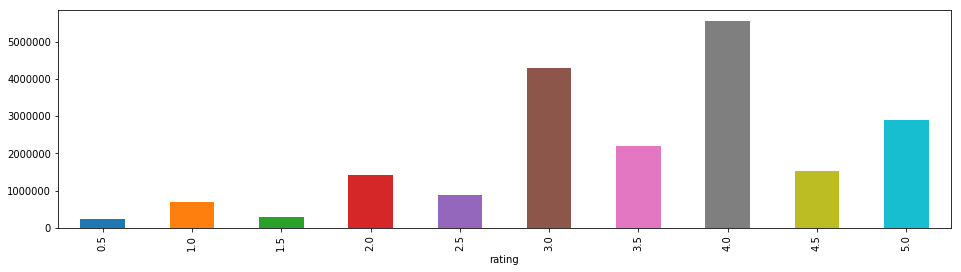

In [6]:
# Cuantos ratings hay con cada puntuacion?
# No me interesan los bajos. Entiendo que "comprar" el item es darle un buen rating
count_by_rank = ratings.groupby('rating').size()
display(count_by_rank)
count_by_rank.plot.bar(figsize=(16, 4))

In [13]:
# voy a tomar solo los ratings > a lo que defino
min_rating_to_count = 5
ratings_good = ratings[ratings['rating'] >= min_rating_to_count]
print('ratings_good -- dimensions: {0};   size: {1}'.format(ratings_good.shape, size(ratings_good)))
display(ratings_good.head(30))

ratings_good -- dimensions: (2898660, 3);   size: 92.76 MB


,userId,movieId,rating
131,1,4993,5.0
142,1,5952,5.0
158,1,7153,5.0
170,1,8507,5.0
176,2,62,5.0
177,2,70,5.0
180,2,260,5.0
181,2,266,5.0
183,2,480,5.0
184,2,541,5.0


In [50]:
# tomo al "userid" como el identificador de transaccion.
# Interpreto que lo cada uusario vio y valoro positivamente es un "compra"
# Quitar el rating que no es necesario
ratings_cleaned = ratings.drop(columns=['rating']).sort_values(by=['userId', 'movieId'])

# identificar las transacciones (IDUSUARIO = [ID_PELI_1, ID_PELI_n, ID_PELI_m, ...])
# transactions = ratings_cleaned.groupby('userId')['movieId'].apply(list)
# grabar a disco las transacciones (para evitar reacer todos los)
transactions = ratings_cleaned.values.tolist()
print('------------- Transacciones (solo algunas) -----------------')
display(transactions[:20])
print('Largo de algunas transacciones: ')

------------- Transacciones (solo algunas) -----------------


[[1, 2],
 [1, 29],
 [1, 32],
 [1, 47],
 [1, 50],
 [1, 112],
 [1, 151],
 [1, 223],
 [1, 253],
 [1, 260],
 [1, 293],
 [1, 296],
 [1, 318],
 [1, 337],
 [1, 367],
 [1, 541],
 [1, 589],
 [1, 593],
 [1, 653],
 [1, 919]]

Largo de algunas transacciones: 


In [ ]:
from efficient_apriori import apriori

print('Transacciones encontradas: {}'.format(len(transactions)))
# para probar solo con algunos
transactions = transactions[:100]
print('Usando transacciones: {}'.format(transactions))

def gen_transactions():
    for t in transactions:
        yield t

min_support = 0.1
min_confidence = 0.7
min_lift = 9
itemsets, rules = apriori(gen_transactions(), 
                          max_length=2,
                          min_support=min_support,
                          min_confidence=min_confidence)

print(f'------------- RULES Support:{min_support} Confidence:{min_confidence}-----------------')
#rules = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
rules=sorted(rules, key=lambda rule: 1 - rule.confidence)
selected_rules = []
for rule in rules:
    if rule.lift > min_lift:
        jrule = {
            'izq':rule.lhs[0],
            'der':rule.rhs[0],
            'conf': rule.confidence, 
            'supp': rule.support, 
            'lift': rule.lift,
            'conv': rule.conviction
        }
        selected_rules.append(jrule)
        print(rule) # Prints the rule and its confidence, support, lift, ...

import json
jrules_str = json.dumps(selected_rules, indent=2)
f = open('jrules.json', 'w')
f.write(jrules_str)
f.close()

print('End rules')

## Corrido en nabucodonosor de CCAD

```
End rules
```


In [45]:
def get_movie_title(movieId):
    flt = movies['movieId'] == movieId
    rows = movies[flt]
    return list(rows['title'])[0]

print('Test get_movie_title: {}'.format(get_movie_title(317)))

Test get_movie_title: Santa Clause, The (1994)


In [47]:
# ver que peliculas son 
for rule in selected_rules:
    izq = rule.lhs
    der = rule.rhs
    
    txt = ('Con una confianza de {} (y lift {})'
            'a los que le gusto la película {} '
            'les gusto tambien {}'.format(rule.confidence,
                                          rule.lift,
                                          get_movie_title(izq[0]),
                                          get_movie_title(der[0])))
    print(txt)

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Indian in the Cupboard, The (1995) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Don Juan DeMarco (1995) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ed Wood (1994) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Nell (1994) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Léon: The P

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Enter the Dragon (1973) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jason and the Argonauts (1963) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Harry Potter and the Prisoner of Azkaban (2004) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Picture of Dorian Gray, The (1945) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Freaks (1932) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Spider-Man 2 (2004) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Slaughterhouse-Five (1972) les gusto tambien Jumanji (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Incredibles, The (2004) le

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Peggy Sue Got Married (1986) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película ¡Three Amigos! (1986) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película My Favorite Martian (1999) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Earthquake (1974) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Deep End of the Ocean, The (1999) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Forces of Nature (1999) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pushing Tin (1999) les gusto tambien Sabrina (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mummy, The (1932) les gusto tambien Sabrina (1995)
C

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película First Knight (1995) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Net, The (1995) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Walk in the Clouds, A (1995) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dumb & Dumber (Dumb and Dumber) (1994) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película French Kiss (1995) les gusto tambien GoldenEye (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle on 34th Street (1994) les gusto tambien

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Waiting for Guffman (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Donnie Brasco (1997) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Donnie Brasco (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Romy and Michele's High School Reunion (1997) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Romy and Michele's High School Reunion (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Austin Powers: International Man of Mystery (1997) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Austin Powe

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Notting Hill (1999) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Notting Hill (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Big Daddy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wild Wild West (1999) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Wild Wild West (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Ghostbusters (a.k.a. Ghost Busters) (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystery Men (1999) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pe

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien What Lies Beneath (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Autumn in New York (2000) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Autumn in New York (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hollow Man (2000) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Hollow Man (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Space Cowboys (2000) les gusto tambien Cutthroat Island (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cutthroat Island (1995) les gusto tambien Space Cowboys (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Casino (1995) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Casino (1995) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Gods and Monsters (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Stepford Wives, The (1975) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Stepford Wives, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Godzilla (Gojira) (1954) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Godzilla (Gojira) (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película King Kong (1976) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien King Kong (1976)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Casino (1995) les gusto tambien Babe: Pig in the City (1998)
C

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Predator (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Prince of Tides, The (1991) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Prince of Tides, The (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gladiator (2000) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Gladiator (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Battlefield Earth (2000) les gusto tambien Casino (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Casino (1995) les gusto tambien Battlefield Earth (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blazing Saddles (1974) les gusto tambien Casino (1995)
Con una confi

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Walk in the Clouds, A (1995) les gusto tambien Ace Ventura: When Nature Calls (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Ace Ventura: When Nature Calls (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dumb & Dumber (Dumb and Dumber) (1994) les gusto tambien Ace Ventura: When Nature Calls (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película French Kiss (1995) les gusto tambien Ace Ventura: When Nature Calls (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle on 34th Street (1994) les gusto tambien Ace Ventura: When Nature Calls (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien Ace Ventura: When Nature Calls (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Outbreak (1995) les gusto

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Amadeus (1984) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Day the Earth Stood Still, The (1951) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Duck Soup (1933) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Better Off Dead... (1985) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Groundhog Day (1993) les gusto tambien Powder (1995)
Con una confianza d

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película EDtv (1999) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Matrix, The (1999) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Out-of-Towners, The (1999) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pushing Tin (1999) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Night of the Comet (1984) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película My Science Project (1985) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mummy, The (1932) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Superman (1978) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Everybody's All-American (1988) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Short Circuit (1986) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Her Alibi (1989) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle Mile (1989) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jurassic Park III (2001) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película America's Sweethearts (2001) les gusto tambien Powder (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Planet of the Apes (2001) les gusto tambien Powder (1995)

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Excalibur (1981)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Ferris Bueller's Day Off (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Dirty Dozen, The (1967)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Goldfinger (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Mononoke (Mononoke-hime) (1997) les gusto tambien City of Lost Children, The (Cité des enfants perdus, La) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película City of Lost Children, The (Cité des enfants per

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Scary Movie 3 (2003) les gusto tambien City of Lost Children, The (Cité des enfants perdus, La) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Scary Movie 3 (2003)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Invasion of the Body Snatchers (1978) les gusto tambien City of Lost Children, The (Cité des enfants perdus, La) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película City of Lost Children, The (Cité des enfants perdus, La) (1995) les gusto tambien Invasion of the Body Snatchers (1978)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Witches, The (1990) les gusto tambien City of Lost Children, The (Cité des enfants perdus, La) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película City of Lost Children, The (Cité des e

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle on 34th Street (1994) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Outbreak (1995) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pulp Fiction (1994) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Seven (a.k.a. Se7en) (1995) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Virtuosity (1995) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jason and the Argonauts (1963) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Harry Potter and the Prisoner of Azkaban (2004) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Picture of Dorian Gray, The (1945) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Freaks (1932) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Spider-Man 2 (2004) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Slaughterhouse-Five (1972) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Incredibles, The (2004) les gusto tambien Seven (a.k.a. Se7en) (1995)
Con

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película This Is Spinal Tap (1984) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American Werewolf in London, An (1981) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Usual Suspects, The (1995) les gusto tambien American Werewolf in London, An (1981)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película April Fool's Day (1986) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Birds, The (1963) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Usual Suspects, The (1995) les gusto tambien Birds, The (1963)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Carrie (1976) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lif

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brotherhood of the Wolf (Pacte des loups, Le) (2001) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dragonslayer (1981) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Conan the Destroyer (1984) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película M*A*S*H (a.k.a. MASH) (1970) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Vampire Hunter D: Bloodlust (Banpaia hantâ D) (2000) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Time Machine, The (2002) les gusto tambien Usual Suspects, The (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Clash of the Titans (1981) les gusto tambien Us

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película From Dusk Till Dawn (1996) les gusto tambien Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película From Dusk Till Dawn (1996) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glory Daze (1995) les gusto tambien From Dusk Till Dawn (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película From Dusk Till Dawn (1996) les gusto tambien Glory Daze (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película From Dusk Till Dawn (1996) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Amityville Horror, The (1979) les gusto tambien From Dusk Till Dawn (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película From Dusk Till Dawn (1996) les gusto 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien Sound of Music, The (1965)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien Die Hard (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película That Thing You Do! (1996) les gusto tambien Happy Gilmore (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien That Thing You Do! (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien Monty Python's Life of Brian (1979)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien Indiana Jones and the Last Crusade (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Happy Gilmore (1996) les gusto tambien Jerry Maguire (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gus

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Honey, I Shrunk the Kids (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Doctor Zhivago (1965) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Doctor Zhivago (1965)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lady and the Tramp (1955) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Lady and the Tramp (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Mermaid, The (1989) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Who Framed Roger Rabbit? (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Thunderball (1965) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Thunderball (1965)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bachelor, The (1999) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Bachelor, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Mystic Pizza (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sweet November (2001) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Sweet November (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fortune Cookie, The (1966) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995) les gusto tambien Fortune Cookie, The (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mummy Returns, The (2001) les gusto tambien Bridges of Madison County, The (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bridges of Madison County, The (1995)

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Watership Down (1978) les gusto tambien Rumble in the Bronx (Hont faan kui) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Watership Down (1978)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Dark Crystal, The (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Legend (1985) les gusto tambien Rumble in the Bronx (Hont faan kui) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Legend (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Navigator: A Mediaeval Odyssey, The (1988) les gusto tambien Rumble in the Bronx (Hont faan kui) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rumble in th

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Invasion of the Body Snatchers (1978) les gusto tambien Rumble in the Bronx (Hont faan kui) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Invasion of the Body Snatchers (1978)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Witches, The (1990) les gusto tambien Rumble in the Bronx (Hont faan kui) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Witches, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Witches of Eastwick, The (1987) les gusto tambien Rumble in the Bronx (Hont faan kui) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rumble in the Bronx (Hont faan kui) (1995) les gusto tambien Witches of Eastwick, The (1987)
Con una confianza de 1.0 (y lift 10.0)a 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Waiting for Guffman (1996) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Waiting for Guffman (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Donnie Brasco (1997) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Donnie Brasco (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Romy and Michele's High School Reunion (1997) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Romy and Michele's High School Reunion (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Austin Powers: International Man of Mystery (1997) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wild Wild West (1999) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Wild Wild West (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Boomerang (1992) les gusto tambien Ghostbusters (a.k.a. Ghost Busters) (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystery Men (1999) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Mystery Men (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mosquito Coast, The (1986) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Mosquito Coast, The (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Outrageous Fortune (1987)

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Boomerang (1992) les gusto tambien Unbreakable (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película What Women Want (2000) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien What Women Want (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Finding Forrester (2000) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Finding Forrester (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Family Man, The (2000) les gusto tambien Boomerang (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boomerang (1992) les gusto tambien Family Man, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Officer and a Gentleman, An (1982) les gust

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Net, The (1995) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Walk in the Clouds, A (1995) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Don Juan DeMarco (1995) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dumb & Dumber (Dumb and Dumber) (1994) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ed Wood (1994) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película French Kiss (1995) les gusto tambien Apollo 13 (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle on 34th Street (1994) les gusto tambien Apo

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Doctor Zhivago (1965) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lady and the Tramp (1955) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Little Mermaid, The (1989) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Splash (1984) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película L.A. Story (1991) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Grand Canyon (1991) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ever After: A Cinderella Story (1998) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Watership Down (1978) les gusto tambien Rob Roy (1995)
Con u

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Invisible Man, The (1933) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rob Roy (1995) les gusto tambien Invisible Man, The (1933)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Charlie's Angels (2000) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Legend of Bagger Vance, The (2000) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bounce (2000) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película How the Grinch Stole Christmas (a.k.a. The Grinch) (2000) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000) les gusto tambien Rob Roy (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gust

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Batman Forever (1995) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Virtuosity (1995) les gusto tambien Batman Forever (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Batman Forever (1995) les gusto tambien Virtuosity (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Batman Forever (1995) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ace Ventura: Pet Detective (1994) les gusto tambien Batman Forever (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Batman Forever (1995) les gusto tambien Ace Ventura: Pet Detective (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Clear and Present Danger (1994) les gusto tambien Batman Forever (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le g

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Congo (1995) les gusto tambien Cool Hand Luke (1967)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Congo (1995) les gusto tambien Young Frankenstein (1974)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película This Is Spinal Tap (1984) les gusto tambien Congo (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Congo (1995) les gusto tambien This Is Spinal Tap (1984)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Congo (1995) les gusto tambien When Harry Met Sally... (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Congo (1995) les gusto tambien American Werewolf in London, An (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película April Fool's Day (1986) les gusto tambien Congo (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Congo (1995) les gusto tambien April Foo

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Logan's Run (1976) les gusto tambien Congo (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Congo (1995) les gusto tambien Logan's Run (1976)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Beneath the Planet of the Apes (1970) les gusto tambien Congo (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Congo (1995) les gusto tambien Beneath the Planet of the Apes (1970)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Battle for the Planet of the Apes (1973) les gusto tambien Congo (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Congo (1995) les gusto tambien Battle for the Planet of the Apes (1973)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Conquest of the Planet of the Apes (1972) les gusto tambien Congo (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pe

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película When a Man Loves a Woman (1994) les gusto tambien Crimson Tide (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Crimson Tide (1995) les gusto tambien When a Man Loves a Woman (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cliffhanger (1993) les gusto tambien Crimson Tide (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Crimson Tide (1995) les gusto tambien Cliffhanger (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crimson Tide (1995) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crimson Tide (1995) les gusto tambien Mrs. Doubtfire (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crimson Tide (1995) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crimson Tide (1995) 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien Cliffhanger (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien Mrs. Doubtfire (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien Schindler's List (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Johnny Mnemonic (1995) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Threesome (1994) les gusto tambien Johnny Mnemonic (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Johnny Mnemoni

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Return to Oz (1985) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Tron (1982) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película 1984 (Nineteen Eighty-Four) (1984) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gods Must Be Crazy, The (1980) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Simon Birch (1998) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American History X (1998) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película King Kong (1933) les gusto tambien Judge Dredd (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fletch (1985) les gusto tambien Judge

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek III: The Search for Spock (1984) les gusto tambien Kids (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Kids (1995) les gusto tambien Star Trek III: The Search for Spock (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien Kids (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Kids (1995) les gusto tambien Star Trek IV: The Voyage Home (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sneakers (1992) les gusto tambien Kids (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Kids (1995) les gusto tambien Sneakers (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Kids (1995) les gusto tambien Contact (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mimic (1997) les gusto tambien K

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Kids (1995) les gusto tambien Dr. No (1962)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop (1987) les gusto tambien Kids (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Kids (1995) les gusto tambien RoboCop (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop 2 (1990) les gusto tambien Kids (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Kids (1995) les gusto tambien RoboCop 2 (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Kids (1995) les gusto tambien Spaceballs (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Kids (1995) les gusto tambien Trading Places (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984) les gusto tambien Kids (1995)
Con una confianza de 1.0 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto tambien Young Frankenstein (1974)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película This Is Spinal Tap (1984) les gusto tambien Species (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Species (1995) les gusto tambien This Is Spinal Tap (1984)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto tambien When Harry Met Sally... (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto tambien American Werewolf in London, An (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película April Fool's Day (1986) les gusto tambien Species (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Species (1995) les gusto tambien April Fool's Day (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Species (1995) les gusto tambien Phantasm (1979)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto tambien Total Recall (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto tambien Ferris Bueller's Day Off (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Species (1995) les gusto tambien Goldfinger (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. No (1962) les gusto tambien Species (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Species (1995) les gusto tambien Dr. No (1962)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop (1987) les gusto tambien Species (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Species (1995) les gusto tambien RoboCop (1987)
Con una confianza de 1.0 (y lift 10.0)a los

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Aladdin (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Batman (1989) les gusto tambien Waterworld (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Waterworld (1995) les gusto tambien Batman (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Beauty and the Beast (1991)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waterworld (1995) les gusto tambien Heavy Metal (1981)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto ta

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beneath the Planet of the Apes (1970) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Battle for the Planet of the Apes (1973) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Conquest of the Planet of the Apes (1972) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Escape from the Planet of the Apes (1971) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cruel Intentions (1999) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lock, Stock & Two Smoking Barrels (1998) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dead Ringers (1988) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gu

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Picture of Dorian Gray, The (1945) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Freaks (1932) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Spider-Man 2 (2004) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Slaughterhouse-Five (1972) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Incredibles, The (2004) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Constantine (2005) les gusto tambien Clerks (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ed Wood (1994) les gusto tambien Don Juan DeMarco (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Don Juan DeMarco (1995) les gusto tambien Ed Wood (1994)
Con una c

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien French Kiss (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película French Kiss (1995) les gusto tambien Natural Born Killers (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Outbreak (1995) les gusto tambien French Kiss (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película French Kiss (1995) les gusto tambien Outbreak (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película French Kiss (1995) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Virtuosity (1995) les gusto tambien French Kiss (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película French Kiss (1995) les gusto tambien Virtuosity (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película French Kiss (1995) les gusto tambien While You 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película I.Q. (1994) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película I.Q. (1994) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película I.Q. (1994) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grand Canyon (1991) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Grand Canyon (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ever After: A Cinderella Story (1998) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Ever After: A Cinderella Story (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película St. Elmo's Fire (1985) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien St. Elmo's Fire (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dirty Work (1998) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Dirty Work (1998)
Con una co

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good Morning, Vietnam (1987) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Good Morning, Vietnam (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Inherit the Wind (1960) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Inherit the Wind (1960)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película I.Q. (1994) les gusto tambien Ladyhawke (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Murphy's Romance (1985) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Murphy's Romance (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Frequency (2000) les gusto tambien I.Q. (1994)
Con una confianza de 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ocean's Eleven (2001) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Ocean's Eleven (2001)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película I.Q. (1994) les gusto tambien Lord of the Rings: The Fellowship of the Ring, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Majestic, The (2001) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Majestic, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Beautiful Mind, A (2001) les gusto tambien I.Q. (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película I.Q. (1994) les gusto tambien Beautiful Mind, A (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ali (2001) les gusto tambien I.Q. (1994)
Con 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Outbreak (1995) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Virtuosity (1995) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ace Ventura: Pet Detective (1994) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Clear and Present Danger (1994) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crow, The (1994) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Reality Bites (1994) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película When a Man Loves a Woman (1994) les gusto tambien Legends of the Fall (1994)
Con una confianza de 1.0 (y lift 5.0)a 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Donnie Brasco (1997) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Donnie Brasco (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Romy and Michele's High School Reunion (1997) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Romy and Michele's High School Reunion (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Austin Powers: International Man of Mystery (1997) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Austin Powers: International Man of Mystery (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Face/Off (1997) les gusto tambien Losing Isaiah

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Blue Lagoon, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Who Framed Roger Rabbit? (1988) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Who Framed Roger Rabbit? (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Thunderball (1965) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Thunderball (1965)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bachelor, The (1999) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Bachelor, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omega M

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Mystic Pizza (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sweet November (2001) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Sweet November (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fortune Cookie, The (1966) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Fortune Cookie, The (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mummy Returns, The (2001) les gusto tambien Losing Isaiah (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Losing Isaiah (1995) les gusto tambien Mummy Returns, The (2001)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Losing

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Waiting for Guffman (1996) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Donnie Brasco (1997) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Romy and Michele's High School Reunion (1997) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Austin Powers: International Man of Mystery (1997) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Face/Off (1997) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Conspiracy Theory (1997) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película L.A. Confidential (1997) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la pe

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Finding Forrester (2000) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Family Man, The (2000) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Officer and a Gentleman, An (1982) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mystic Pizza (1988) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sweet November (2001) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fortune Cookie, The (1966) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mummy Returns, The (2001) les gusto tambien Milk Money (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Moulin Rouge (2001) les gu

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien Crow, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Reality Bites (1994) les gusto tambien Natural Born Killers (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien Reality Bites (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película When a Man Loves a Woman (1994) les gusto tambien Natural Born Killers (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Natural Born Killers (1994) les gusto tambien When a Man Loves a Woman (1994)
Con una confian

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Frankenstein (1931)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Invasion of the Body Snatchers (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Run Lola Run (Lola rennt) (1998) les gusto tambien Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Run Lola Run (Lola rennt) (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Ghostbusters (a.k.a. Ghost Busters) (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Iron Giant, The 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Witches, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Witches of Eastwick, The (1987) les gusto tambien Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Witches of Eastwick, The (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lord of the Rings: The Return of the King, The (2003) les gusto tambien Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Léon: The Professional (a.k.a. The Professional) (Léon) (1994) les gusto tambien Lord of the Rings: The Return of the King, The (2003)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto l

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Company of Wolves, The (1984) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Harry Potter and the Chamber of Secrets (2002) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sword and the Sorcerer, The (1982) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lord of the Rings: The Two Towers, The (2002) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Heavy Metal 2000 (2000) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Last Unicorn, The (1982) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ringu (Ring) (1998) les gusto tambien Pulp Fiction (1994)
Con una confianza de 1.0 (y lif

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Navigator: A Mediaeval Odyssey, The (1988) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beetlejuice (1988) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Willow (1988) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Simon Birch (1998) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Toys (1992) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Thing, The (1982) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película What's Eating Gilbert Grape (1993) les gusto tambien Thing, The (1982)
Con una co

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Van Helsing (2004) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Enter the Dragon (1973) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jason and the Argonauts (1963) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Harry Potter and the Prisoner of Azkaban (2004) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Picture of Dorian Gray, The (1945) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Freaks (1932) les gusto tambien What's Eating Gilbert Grape (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Spider-Man 2 (2004) les gusto tambi

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Wedding Singer, The (1998) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Hope Floats (1998) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Six Days Seven Nights (1998) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Great Ziegfeld, The (1936) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Klute (1971) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Poseidon Adventure, The (1972) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Doctor Zhivago (1965) les gusto tambien While You Were Sleeping (1995)
Con una confi

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dr. Dolittle 2 (2001) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película A.I. Artificial Intelligence (2001) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Everybody's All-American (1988) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Short Circuit (1986) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Her Alibi (1989) les gusto tambien While You Were Sleeping (1995)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle Mile (1989) les gusto tambien While You Were Sleeping (1995)
Co

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Cape Fear (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Shine (1996) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Shine (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Under Siege (1992) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Under Siege (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mars Attacks! (1996) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Mars Attacks! (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la pelícu

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Forces of Nature (1999) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Forces of Nature (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Pushing Tin (1999) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Pushing Tin (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mummy, The (1932) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Mummy, The (1932)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Superman (1978)
Con una confianza de 1.0 (y lift 10.0)a los que le 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Adventures of Rocky and Bullwinkle, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película X-Men (2000) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien X-Men (2000)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien What Lies Beneath (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Autumn in New York (2000) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Autumn in New York (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hollow Man (2000) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien It's a Mad, Mad, Mad, Mad World (1963)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mulholland Drive (2001) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Mulholland Drive (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Riding in Cars with Boys (2001) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien Riding in Cars with Boys (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película K-PAX (2001) les gusto tambien Bullets Over Broadway (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bullets Over Broadway (1994) les gusto tambien K-PAX (2001)
Con una con

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Day the Earth Stood Still, The (1951) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Day the Earth Stood Still, The (1951)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Duck Soup (1933) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Duck Soup (1933)
Con una confianza de 1.0 (y lif

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lady and the Tramp (1955) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Lady and the Tramp (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Mermaid, The (1989) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Little Mermaid, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película L.A. Story (1991) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien L.A. Story (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grand Canyon (1991) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la p

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boys Don't Cry (1999) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Boys Don't Cry (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Total Recall (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Flashdance (1983) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Flashdance (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Lagoon, The (1980) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Blue Lagoon, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Who Fra

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Blazing Saddles (1974)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fabulous Baker Boys, The (1989) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Fabulous Baker Boys, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Starman (1984) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Starman (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Alien Nation (1988) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Alien Nation (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pelícu

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Tootsie (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Dolittle 2 (2001) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Dr. Dolittle 2 (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película A.I. Artificial Intelligence (2001) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien A.I. Artificial Intelligence (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien Corrina, Corrina (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Corrina, Corrina (1994) les gusto tambien Accidental Tourist, The (1988)
Con una confianza de 1.0 (y li

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebecca (1940) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y l

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jeremiah Johnson (1972) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película March of the Wooden Soldiers (a.k.a. Babes in Toyland) (1934) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Stanley & Iris (1990) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fisher King, The (1991) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Tumbleweeds (1999) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bicentennial Man (1999) les gusto tambien Flintstones, The (1994)
Con una confianza de 1.0 (y lift 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Fou

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Thunderball (1965) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bachelor, The (1999) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jeremiah Johnson (1972) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película March of the Wooden Soldiers (a.k.a. Babes in Toyland) (1934) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Stanley & Iris (1990) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fisher King, The (1991) les gusto ta

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Everybody's All-American (1988) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Short Circuit (1986) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Her Alibi (1989) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Miracle Mile (1989) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jurassic Park III (2001) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película America's Sweethearts (2001) les gusto tambien Four Weddings and a Funeral (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Planet of the Apes (2001) les gusto tambien Four Weddings and 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Last of the Mohicans, The (1992) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Last of the Mohicans, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Michael (1996) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Michael (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Benny & Joon (1993) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Benny & Joon (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Waiting for Guffman (1996) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película For Love of the Game (1999) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien For Love of the Game (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Double Jeopardy (1999) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Double Jeopardy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boys Don't Cry (1999) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Boys Don't Cry (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Total Recall (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto l

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Time Machine, The (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Charlie's Angels (2000) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Charlie's Angels (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Legend of Bagger Vance, The (2000) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Legend of Bagger Vance, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bounce (2000) les gusto tambien Jungle Book, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jungle Book, The (1994) les gusto tambien Bounce (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gu

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Maverick (1994) les gusto tambien Naked Gun 33 1/3: The Final Insult (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película River Wild, The (1994) les gusto tambien Maverick (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beverly Hills Cop III (1994) les gusto tambien Maverick (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Carlito's Way (1993) les gusto tambien Maverick (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película In the Name of the Father (1993) les gusto tambien Maverick (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Made in America (1993) les gusto tambien Maverick (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Man Without a Face, The (1993) les gusto tambien Maverick (1994)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Remains of the D

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película River Wild, The (1994) les gusto tambien Sound of Music, The (1965)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película River Wild, The (1994) les gusto tambien Die Hard (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película That Thing You Do! (1996) les gusto tambien River Wild, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película River Wild, The (1994) les gusto tambien That Thing You Do! (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película River Wild, The (1994) les gusto tambien Monty Python's Life of Brian (1979)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película River Wild, The (1994) les gusto tambien Indiana Jones and the Last Crusade (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película River Wild, The (1994) les gusto tambien Jerry Maguire (1996)
Con una confianza de 1.0 (y lift 10.0)a 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lady and the Tramp (1955) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Lady and the Tramp (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Mermaid, The (1989) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Little Mermaid, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película L.A. Story (1991) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien L.A. Story (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grand Canyon (1991) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Grand Canyon (

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película For Love of the Game (1999) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien For Love of the Game (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Double Jeopardy (1999) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Double Jeopardy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boys Don't Cry (1999) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Boys Don't Cry (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Total Recall (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Flashdance (1983) les gusto tambien Blue Sky 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Arthur (1981) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Arthur (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Parenthood (1989) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Parenthood (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Predator (1987) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Predator (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Prince of Tides, The (1991) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Prince of Tides, The (1991)
Con una confianza de 1.0

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Accidental Tourist, The (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Everybody's All-American (1988) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Everybody's All-American (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Short Circuit (1986) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto tambien Short Circuit (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Her Alibi (1989) les gusto tambien Blue Sky (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Sky (1994) les gusto

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blue Velvet (1986) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Return to Oz (1985) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Tron (1982) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película 1984 (Nineteen Eighty-Four) (1984) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gods Must Be Crazy, The (1980) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Simon Birch (1998) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American History X (1998) les gusto tambien Demolition Man (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película King Kong (193

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fantastic Voyage (1966) les gusto tambien House of the Spirits, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película House of the Spirits, The (1993) les gusto tambien Fantastic Voyage (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abbott and Costello Meet Frankenstein (1948) les gusto tambien House of the Spirits, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película House of the Spirits, The (1993) les gusto tambien Abbott and Costello Meet Frankenstein (1948)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Creature from the Black Lagoon, The (1954) les gusto tambien House of the Spirits, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película House of the Spirits, The (1993) les gusto tambien Creature from the Black Lagoon, The (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Better Off Dead... (1985) les gusto tambien Malice (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Malice (1993) les gusto tambien Better Off Dead... (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Malice (1993) les gusto tambien Shining, The (1980)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Malice (1993) les gusto tambien Evil Dead II (Dead by Dawn) (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Malice (1993) les gusto tambien Unforgiven (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Malice (1993) les gusto tambien Patton (1970)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Hand Luke (1967) les gusto tambien Malice (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Malice (1993) les gusto tambien Cool Hand Luke (1967)
Con una confi

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Science Project (1985) les gusto tambien Malice (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Malice (1993) les gusto tambien My Science Project (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Malice (1993) les gusto tambien Superman (1978)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Malice (1993) les gusto tambien Superman III (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Superman IV: The Quest for Peace (1987) les gusto tambien Malice (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Malice (1993) les gusto tambien Superman IV: The Quest for Peace (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película War of the Worlds, The (1953) les gusto tambien Malice (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Malice (1993) les gusto tamb

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Batman (1989) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beauty and the Beast (1991) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Philadelphia (1993) les gusto tambien Beauty and the Beast (1991)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fargo (1996) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película All Dogs Go to Heaven 2 (1996) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mystery Science Theater 3000: The Movie (1996) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Wallace & Gromit: The Best of Aardman Animation (1996) les gusto tambien Philadelphia (1993)
Con una confianza de 1.0 (y lift 5.0)a los

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película What Dreams May Come (1998) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien What Dreams May Come (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Piano, The (1993) les gusto tambien 2010: The Year We Make Contact (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Practical Magic (1998) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Practical Magic (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gods and Monsters (1998) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Gods and Monsters (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Stepfor

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good Morning, Vietnam (1987) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Good Morning, Vietnam (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Inherit the Wind (1960) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Inherit the Wind (1960)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Piano, The (1993) les gusto tambien Ladyhawke (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Murphy's Romance (1985) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Murphy's Romance (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Frequency (2000) les gusto

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Accidental Tourist, The (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Everybody's All-American (1988) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Everybody's All-American (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Short Circuit (1986) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The (1993) les gusto tambien Short Circuit (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Her Alibi (1989) les gusto tambien Piano, The (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Piano, The 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Star Trek V: The Final Frontier (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Star Trek II: The Wrath of Khan (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek III: The Search for Spock (1984) les gusto tambien Puppet Masters, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Star Trek III: The Search for Spock (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien Puppet Masters, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Star Trek IV: The Voyage Home (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sneakers (

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Radio Days (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Monty Python's And Now for Something Completely Different (1971) les gusto tambien Puppet Masters, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Monty Python's And Now for Something Completely Different (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Airplane! (1980)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Big (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Universal Soldier (1992) les gusto tambien Puppet Masters, The (1994)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Puppet Masters, The (1994) les gusto tambien Uni

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sleepless in Seattle (1993) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Batman (1989) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pretty Woman (1990) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sleepless in Seattle (1993) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Barbarella (1968) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Sleepless in Seattle (1993)
Con una confi

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gladiator (2000) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Battlefield Earth (2000) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blazing Saddles (1974) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fabulous Baker Boys, The (1989) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Starman (1984) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Alien Nation (1988) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gone in 60 Seconds (2000) les gusto tambien Sleepless in Seattle (1993)
Con una confianza de 1.0 (y lift 5.0)a los q

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Groundhog Day (1993) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fried Green Tomatoes (1991) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Forbidden Planet (1956) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cape Fear (1991) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Shine (1996) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Under Siege (1992) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mars Attacks! (1996) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Last of the Mohicans, The (1992) les gusto tambien Tombstone (1993)


Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Love Potion #9 (1992) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Von Ryan's Express (1965) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Catch-22 (1970) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Tootsie (1982) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dr. Dolittle 2 (2001) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película A.I. Artificial Intelligence (2001) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien Tombstone (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Everybody's All-American (1988) les gusto t

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Stepford Wives, The (1975) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Godzilla (Gojira) (1954) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película King Kong (1976) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Home Fries (1998) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Little Voice (1998) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Shakespeare in Love (1998) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película First Blood (Rambo: First Blood) (1982) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jewel of the Nil

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beautiful Mind, A (2001) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ali (2001) les gusto tambien Pretty Woman (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película All Dogs Go to Heaven 2 (1996) les gusto tambien Fargo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fargo (1996) les gusto tambien All Dogs Go to Heaven 2 (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystery Science Theater 3000: The Movie (1996) les gusto tambien Fargo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fargo (1996) les gusto tambien Mystery Science Theater 3000: The Movie (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wallace & Gromit: The Best of Aardman Animation (1996) les gusto tambien Fargo (1996)
Con una confianza de 1.0 (y lift 10.0)a l

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) les gusto tambien Dragonheart (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Dragonheart (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rosencrantz and Guildenstern Are Dead (1990) les gusto tambien Dragonheart (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Dragonheart (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Great Escape, The (1963) les gusto tambien Dragonheart (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922) les gusto tambien Dragonheart (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Omen, The (1976) les gusto tambien Dragonheart (1996)
Con una co

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Barbarella (1968) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) le

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Peggy Sue Got Married (1986) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Peggy Sue Got Married (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película ¡Three Amigos! (1986) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien ¡Three Amigos! (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Favorite Martian (1999) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien My Favorite Martian (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Earthquake (1974) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good Morning, Vietnam (1987) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Good Morning, Vietnam (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Inherit the Wind (1960) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Inherit the Wind (1960)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Barbarella (1968) les gusto tambien Ladyhawke (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Murphy's Romance (1985) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Murphy's Romance (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Frequency (2000) les gusto

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Beautiful Mind, A (2001) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Beautiful Mind, A (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ali (2001) les gusto tambien Barbarella (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Barbarella (1968) les gusto tambien Ali (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Visitors, The (Visiteurs, Les) (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Visitors, The (Visiteurs, Les) (1993) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Visitors, The (Visiteurs, Les) (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pelícu

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Visitors, The (Visiteurs, Les) (1993) les gusto tambien Simon Birch (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Visitors, The (Visiteurs, Les) (1993) les gusto tambien Thing, The (1982)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Visitors, The (Visiteurs, Les) (1993) les gusto tambien 2010: The Year We Make Contact (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American History X (1998) les gusto tambien Visitors, The (Visiteurs, Les) (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Visitors, The (Visiteurs, Les) (1993) les gusto tambien American History X (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película King Kong (1933) les gusto tambien Visitors, The (Visiteurs, Les) (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Visitors, The (Visiteurs, Les) (1993) l

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien ¡Three Amigos! (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Favorite Martian (1999) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien My Favorite Martian (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Earthquake (1974) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Earthquake (1974)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Deep

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hollow Man (2000) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Hollow Man (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Space Cowboys (2000) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) les gusto tambien Space Cowboys (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Steel Magnolias (1989) les gusto tambien Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Strangelove

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Mars Attacks! (1996)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Jerry Maguire (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Last of the Mohicans, The (1992) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Last of the Mohicans, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Michael (1996) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Michael (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Benny & Joon (1993) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pelícu

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Ghostbusters (a.k.a. Ghost Busters) (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystery Men (1999) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Mystery Men (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mosquito Coast, The (1986) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Mosquito Coast, The (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Outrageous Fortune (1987) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Outrageous Fortune (1987)
Con una confianza de 1.0 (y lift 5.0)

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Unbreakable (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película What Women Want (2000) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien What Women Want (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Finding Forrester (2000) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Finding Forrester (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Family Man, The (2000) les gusto tambien American Buffalo (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Buffalo (1996) les gusto tambien Family Man, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pel

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cape Fear (1991) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Cape Fear (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Shine (1996) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Shine (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Under Siege (1992) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Under Siege (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mars Attacks! (1996) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Mars Attacks! (1996)
Con una confianza de 1.0 (y lift 5.0)a los q

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Notting Hill (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Big Daddy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wild Wild West (1999) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Wild Wild West (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Ghostbusters (a.k.a. Ghost Busters) (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystery Men (1999) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Mystery Men (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mosquito Coast, The (1986) les gusto tambien Tin Cup (199

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Family Man, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Officer and a Gentleman, An (1982) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Officer and a Gentleman, An (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystic Pizza (1988) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Mystic Pizza (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sweet November (2001) les gusto tambien Tin Cup (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tin Cup (1996) les gusto tambien Sweet November (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fortune Cookie, The (1966) les gusto tam

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Austin Powers: International Man of Mystery (1997) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Austin Powers: International Man of Mystery (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Face/Off (1997) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Face/Off (1997)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Men in Black (a.k.a. MIB) (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Conspiracy Theory (1997) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Bowfinger (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien American Beauty (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película For Love of the Game (1999) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien For Love of the Game (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Double Jeopardy (1999) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Double Jeopardy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boys Don't Cry (1999) les gusto tambien Island of Dr. Moreau, The (199

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Autumn in New York (2000) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Autumn in New York (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hollow Man (2000) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Hollow Man (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Space Cowboys (2000) les gusto tambien Island of Dr. Moreau, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Island of Dr. Moreau, The (1996) les gusto tambien Space Cowboys (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Steel Magnolias (1989) les gusto tambien Island of Dr. Moreau, The (1996)
Con una

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Repo Man (1984) les gusto tambien Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995) les gusto tambien Repo Man (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Nightmare on Elm Street 2: Freddy's Revenge, A (1985) les gusto tambien Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Halloween: The Curse of Michael Myers (Halloween 6: The Curse of Michael Myers) (1995) les gusto tambien Nightmare on Elm Street 2: Freddy's Revenge, A (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Nightmare on Elm Street 3: Dream Warriors, A (1987) les gusto tambien Halloween: The Curse of M

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Klute (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Back to the Future Part II (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Back to the Future Part III (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Poseidon Adventure, The (1972) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Poseidon Adventure, The (1972)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Bambi (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Honey, I Shrunk the Kids (1989)
Con una confianza

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Bowfinger (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien American Beauty (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película For Love of the Game (1999) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien For Love of the Game (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Double Jeopardy (1999) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Double Jeopardy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Boys Don't Cry (1999) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone in 60 Seconds (2000) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Gone in 60 Seconds (2000)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Patriot, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Adventures of Rocky and Bullwinkle, The (2000) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien Adventures of Rocky and Bullwinkle, The (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película X-Men (2000) les gusto tambien Singin' in the Rain (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Singin' in the Rain (1952) les gusto tambien X-Men (2000)
Con una con

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Strictly Ballroom (1992) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Strictly Ballroom (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rear Window (1954) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Bride, The (1987) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Princess Bride, The (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brazi

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Matrix, The (1999) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Matrix, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Out-of-Towners, The (1999) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Out-of-Towners, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Comet (1984) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) les gusto tambien Night of the Comet (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Science Project (1985) les gusto tambien Rear Window (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rear Window (1954) 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek III: The Search for Spock (1984) les gusto tambien It Happened One Night (1934)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Star Trek III: The Search for Spock (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien It Happened One Night (1934)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Star Trek IV: The Voyage Home (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sneakers (1992) les gusto tambien It Happened One Night (1934)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Sneakers (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película It Happened One Night (1934) les gusto tambi

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Total Recall (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Ferris Bueller's Day Off (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Goldfinger (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. No (1962) les gusto tambien It Happened One Night (1934)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien Dr. No (1962)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop (1987) les gusto tambien It Happened One Night (1934)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It Happened One Night (1934) les gusto tambien RoboCop (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pel

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Thunderball (1965) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bachelor, The (1999) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jeremiah Johnson (1972) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película March of the Wooden Soldiers (a.k.a. Babes in Toyland) (1934) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Stanley & Iris (1990) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fisher King, The (1991) les gusto tambien North by Northwest (1959)
Con una confianza de 1

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Officer and a Gentleman, An (1982) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mystic Pizza (1988) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sweet November (2001) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fortune Cookie, The (1966) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mummy Returns, The (2001) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Moulin Rouge (2001) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pearl Harbor (2001) les gusto tambien North by Northwest (1959)
Con una confianza de 1.0 (y lift 5.0)a los que

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Earthquake (1974) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Deep End of the Ocean, The (1999) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Forces of Nature (1999) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pushing Tin (1999) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mummy, The (1932) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Superman II (1980) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Wolf Man, The (1941) les gusto tambien Casablanca (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Notting Hill (1999) les gusto tambien Casablanca (1

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambi

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jewel of the Nile, The (1985) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Jewel of the Nile, The (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Cocoon (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película You've Got Mail (1998) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien You've Got Mail (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Thin Red Line, The (1998) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Thin Red Line, The (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ruthless Pe

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Predator (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Prince of Tides, The (1991) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Prince of Tides, The (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gladiator (2000) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Gladiator (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Battlefield Earth (2000) les gusto tambien My Fair Lady (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película My Fair Lady (1964) les gusto tambien Battlefield Earth (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blazing Saddles (1974) les

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Army of Darkness (1993) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Wizard of Oz, The (1939) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Amadeus (1984) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rosencrantz and G

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dungeons & Dragons (2000) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Snatch (2000) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película O Brother, Where Art Thou? (2000) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Evil Dead, The (1981) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lost Boys, The (1987) les gusto tambien Wizard of Oz, The (1939)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Masters of the Universe (1987) les gusto tambien Wizard of Oz, The (1939)
Con una confianza 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wedding Singer, The (1998) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Wedding Singer, The (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Godzilla (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hope Floats (1998) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Hope Floats (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Six Days Seven Nights (1998) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Six Days Seven Nights (1998)
Con una confianza de 1.0 (y lift 5.0)a los q

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Fisher King, The (1991)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tumbleweeds (1999) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Tumbleweeds (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bicentennial Man (1999) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Bicentennial Man (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Galaxy Quest (1999) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Galaxy Quest (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Tootsie (1982) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Tootsie (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. Dolittle 2 (2001) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien Dr. Dolittle 2 (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película A.I. Artificial Intelligence (2001) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gone with the Wind (1939) les gusto tambien A.I. Artificial Intelligence (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Accidental Tourist, The (1988) les gusto tambien Gone with the Wind (1939)
Con una confianza de 1.0 (y lift

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Truman Show, The (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wedding Singer, The (1998) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Wedding Singer, The (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Godzilla (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hope Floats (1998) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Hope Floats (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Si

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Jeremiah Johnson (1972)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Sleepy Hollow (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película March of the Wooden Soldiers (a.k.a. Babes in Toyland) (1934) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien March of the Wooden Soldiers (a.k.a. Babes in Toyland) (1934)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Stanley & Iris (1990) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Stanley & Ir

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Pearl Harbor (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Love Potion #9 (1992) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Love Potion #9 (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Von Ryan's Express (1965) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) les gusto tambien Von Ryan's Express (1965)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Catch-22 (1970) les gusto tambien Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película S

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película L.A. Confidential (1997) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien L.A. Confidential (1997)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebecca (1940) les gusto tambien Witness (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Truman Show, The (1998) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Truman Show, The (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wedding Singer, The (1998) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Wedding Singer, The (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebecca (1940) les gusto tambien Godzilla (1998)
Con

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Who Framed Roger Rabbit? (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Thunderball (1965) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Thunderball (1965)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bachelor, The (1999) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Bachelor, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Omega Man, The (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebecca (1940) les gusto tambien Spaceballs (1987)
Con una con

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien How the Grinch Stole Christmas (a.k.a. The Grinch) (2000)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebecca (1940) les gusto tambien Unbreakable (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película What Women Want (2000) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien What Women Want (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Finding Forrester (2000) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gusto tambien Finding Forrester (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Family Man, The (2000) les gusto tambien Rebecca (1940)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebecca (1940) les gus

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Michael (1996) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Michael (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Benny & Joon (1993) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Benny & Joon (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Waiting for Guffman (1996) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Waiting for Guffman (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Donnie Brasco (1997) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Omega Man, The (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Spaceballs (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Little Big Man (1970)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Trading Places (1983)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Longest Day, The (1962)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jeremiah Johnson (1972) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lif

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Everybody's All-American (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Short Circuit (1986) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Short Circuit (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Her Alibi (1989) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Her Alibi (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Miracle Mile (1989) les gusto tambien Affair to Remember, An (1957)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Affair to Remember, An (1957) les gusto tambien Miracle Mile (1989)
Con una confianza de 1.0 (y lift 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Home Fries (1998) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Home Fries (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Voice (1998) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Little Voice (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Shakespeare in Love (1998) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Shakespeare in Love (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película First Blood (Rambo: First Blood) (1982) les gusto tambien Around the 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good Morning, Vietnam (1987) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Good Morning, Vietnam (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Inherit the Wind (1960) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Inherit the Wind (1960)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Ladyhawke (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Murphy's Romance (1985) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sea of Love (1989) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Sea of Love (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Diaries, The (2001) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Princess Diaries, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Summer Catch (2001) les gusto tambien Around the World in 80 Days (1956)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Around the World in 80 Days (1956) les gusto tambien Summer Catch (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It's a Mad, Mad, Mad, Mad World (1963) les gusto tambien Around

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fletch (1985) les gusto tambien It's a Wonderful Life (1946)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It's a Wonderful Life (1946) les gusto tambien Fletch (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Simple Plan, A (1998) les gusto tambien It's a Wonderful Life (1946)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It's a Wonderful Life (1946) les gusto tambien Simple Plan, A (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película It's a Wonderful Life (1946) les gusto tambien Cocoon (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Faculty, The (1998) les gusto tambien It's a Wonderful Life (1946)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película It's a Wonderful Life (1946) les gusto tambien Faculty, The (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pel

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien April Fool's Day (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien Birds, The (1963)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Carrie (1976) les gusto tambien Night of the Living Dead (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien Carrie (1976)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien Star Trek: First Contact (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek VI: The Undiscovered Country (1991) les gusto tambien Night of the Living Dead (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien Star Trek VI: The Und

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dr. No (1962) les gusto tambien Night of the Living Dead (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien Dr. No (1962)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop (1987) les gusto tambien Night of the Living Dead (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien RoboCop (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop 2 (1990) les gusto tambien Night of the Living Dead (1968)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien RoboCop 2 (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Night of the Living Dead (1968) les gusto tambien Spaceballs (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Escape to Witch Mountain (1975) les gusto tambien Sleepy Hollow (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película 7th Voyage of Sinbad, The (1958) les gusto tambien Escape to Witch Mountain (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape to Witch Mountain (1975) les gusto tambien 7th Voyage of Sinbad, The (1958)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Hard-Boiled (Lat sau san taam) (1992) les gusto tambien Escape to Witch Mountain (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape to Witch Mountain (1975) les gusto tambien Hard-Boiled (Lat sau san taam) (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Teenage Mutant Ninja Turtles (1990) les gusto tambien Escape to Witch Mountain (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape to Witch Mou

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape to Witch Mountain (1975) les gusto tambien Enter the Dragon (1973)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jason and the Argonauts (1963) les gusto tambien Escape to Witch Mountain (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape to Witch Mountain (1975) les gusto tambien Jason and the Argonauts (1963)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Harry Potter and the Prisoner of Azkaban (2004) les gusto tambien Escape to Witch Mountain (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape to Witch Mountain (1975) les gusto tambien Harry Potter and the Prisoner of Azkaban (2004)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Picture of Dorian Gray, The (1945) les gusto tambien Escape to Witch Mountain (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Godzilla (Gojira) (1954) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Godzilla (Gojira) (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película King Kong (1976) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien King Kong (1976)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Babe: Pig in the City (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Home Fries (1998) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Home Fries (1998)
Con una confianza de 1.0 (y lift 10.0)a 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Graffiti (1973) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien American Graffiti (1973)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Erin Brockovich (2000) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Erin Brockovich (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Crimson Pirate, The (1952) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Crimson Pirate, The (1952)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good Morning, Vietnam (1987) les gusto tambien Swiss Family Robinson (1960)
Con una c

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Lord of the Rings: The Fellowship of the Ring, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Majestic, The (2001) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Majestic, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Beautiful Mind, A (2001) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Beautiful Mind, A (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ali (2001) les gusto tambien Swiss Family Robinson (1960)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swiss Family Robinson (1960) les gusto tambien Ali (2001)
Con una confianza

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Godzilla (Gojira) (1954) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Godzilla (Gojira) (1954)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película King Kong (1976) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien King Kong (1976)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Babe: Pig in the City (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Home Fries (1998) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Home Fries (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Voice (1998) les gus

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Murphy's Romance (1985) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Murphy's Romance (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Frequency (2000) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Frequency (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return to Me (2000) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Return to Me (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Arthur (1981) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Beautiful Mind, A (2001) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Beautiful Mind, A (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ali (2001) les gusto tambien Cool Runnings (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Runnings (1993) les gusto tambien Ali (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sound of Music, The (1965) les gusto tambien Mary Poppins (1964)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mary Poppins (1964) les gusto tambien Sound of Music, The (1965)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Mary Poppins (1964) les gusto tambien Die Hard (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película That Thing You Do! (1996) les gusto t

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Bonnie and Clyde (1967)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Lawnmower Man, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Rebel Without a Cause (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Lawnmower Man, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Return of the Pink Panther, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abyss, The (1989) les gusto tambien Lawnmower Man, The (1992)
Con una co

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from the Planet of the Apes (1971) les gusto tambien Lawnmower Man, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Escape from the Planet of the Apes (1971)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cruel Intentions (1999) les gusto tambien Lawnmower Man, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Cruel Intentions (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Ringers (1988) les gusto tambien Lawnmower Man, The (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lawnmower Man, The (1992) les gusto tambien Dead Ringers (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película EDtv (1999) les gusto tambien Lawnmower Man, The (1992)
Con una confianza de 1.0 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien Star Trek III: The Search for Spock (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien Swingers (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien Star Trek IV: The Voyage Home (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sneakers (1992) les gusto tambien Swingers (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien Sneakers (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swingers (1996) les gusto tambien Contact (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mimic (1997) les gusto tambien Swingers (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien Yellow Submarine (1968)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swingers (1996) les gusto tambien Excalibur (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Monkey Shines (1988) les gusto tambien Swingers (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien Monkey Shines (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Phantasm (1979) les gusto tambien Swingers (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Swingers (1996) les gusto tambien Phantasm (1979)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swingers (1996) les gusto tambien Total Recall (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Swingers (1996) les gusto tambien Ferris Bueller's Day Off (1986)
Con una conf

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Jewel of the Nile, The (1985) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cocoon (1985) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sleeper (1973) les gusto tambien Cocoon (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película You've Got Mail (1998) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Thin Red Line, The (1998) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Faculty, The (1998) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Virus (1999) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ruthless People (1986) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y l

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Riding in Cars with Boys (2001) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película K-PAX (2001) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ocean's Eleven (2001) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Majestic, The (2001) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beautiful Mind, A (2001) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ali (2001) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película M*A*S*H (a.k.a. MASH) (1970) les gusto tambien Sleeper (1973)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Platoon (1986) les gusto tambien Monty Python's Life of Brian (1979)
Con

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Better Off Dead... (1985) les gusto tambien Bonnie and Clyde (1967)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Better Off Dead... (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Shining, The (1980)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Evil Dead II (Dead by Dawn) (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Unforgiven (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Patton (1970)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cool Ha

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Monty Python's And Now for Something Completely Different (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Airplane! (1980)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Big (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Universal Soldier (1992) les gusto tambien Bonnie and Clyde (1967)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Universal Soldier (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Yellow Submarine (1968) les gusto tambien Bonnie and Clyde (1967)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bonnie and Clyde (1967) les gusto tambien Yellow Submarine (1968)
Con una confianza de 1.0 (y lift 5

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Beneath the Planet of the Apes (1970) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Battle for the Planet of the Apes (1973) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Conquest of the Planet of the Apes (1972) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Escape from the Planet of the Apes (1971) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cruel Intentions (1999) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lock, Stock & Two Smoking Barrels (1998) les gusto tambien Reservoir Dogs (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dead Ringers (1988) les gusto tambien Reservoir Dogs (19

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omen, The (1976) les gusto tambien Platoon (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Omen, The (1976)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sling Blade (1996) les gusto tambien Platoon (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Sling Blade (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Die Hard 2 (1990) les gusto tambien Platoon (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Die Hard 2 (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Platoon (1986) les gusto tambien Star Trek II: The Wr

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Platoon (1986) les gusto tambien Lord of the Rings: The Fellowship of the Ring, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brotherhood of the Wolf (Pacte des loups, Le) (2001) les gusto tambien Platoon (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Brotherhood of the Wolf (Pacte des loups, Le) (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dragonslayer (1981) les gusto tambien Platoon (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Dragonslayer (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Conan the Destroyer (1984) les gusto tambien Platoon (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Platoon (1986) les gusto tambien Conan the Destroyer (1984)
Con una confianza de 1.0 (y l

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Conspiracy Theory (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película L.A. Confidential (1997) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien L.A. Confidential (1997)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Witness (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Truman Show, The (1998) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Truman Show, The (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wedding Singer, The (1998) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Flashdance (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blue Lagoon, The (1980) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Blue Lagoon, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Who Framed Roger Rabbit? (1988) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Who Framed Roger Rabbit? (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Thunderball (1965) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Thunderball (1965)
Con una confianza de 1.0 (y lift 1

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Officer and a Gentleman, An (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mystic Pizza (1988) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Mystic Pizza (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sweet November (2001) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Sweet November (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fortune Cookie, The (1966) les gusto tambien Glengarry Glen Ross (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Glengarry Glen Ross (1992) les gusto tambien Fortune Cookie, The (1966)
Con una confianza de 1.0 (y l

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Bambi (1942)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Honey, I Shrunk the Kids (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Doctor Zhivago (1965) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien Doctor Zhivago (1965)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lady and the Tramp (1955) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien Lady and the Tramp (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Mermaid, The (1989) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien Little Mermaid, Th

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien Bachelor, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omega Man, The (1971) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien Omega Man, The (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Spaceballs (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Little Big Man (1970)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Trading Places (1983)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Longest Day, The (1962)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Jeremiah Johnson (1972) les gusto tambien Top Gun (1986)
Con una confi

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien How the Grinch Stole Christmas (a.k.a. The Grinch) (2000)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Top Gun (1986) les gusto tambien Unbreakable (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película What Women Want (2000) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien What Women Want (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Finding Forrester (2000) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gusto tambien Finding Forrester (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Family Man, The (2000) les gusto tambien Top Gun (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Top Gun (1986) les gus

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Star Trek V: The Final Frontier (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Star Trek II: The Wrath of Khan (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek III: The Search for Spock (1984) les gusto tambien Rebel Without a Cause (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Star Trek III: The Search for Spock (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien Rebel Without a Cause (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Star Trek IV: The Voyage Home (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la películ

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien My Science Project (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Superman (1978)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Superman III (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Superman IV: The Quest for Peace (1987) les gusto tambien Rebel Without a Cause (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien Superman IV: The Quest for Peace (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película War of the Worlds, The (1953) les gusto tambien Rebel Without a Cause (1955)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rebel Without a Cause (1955) les gusto tambien War of the Worlds,

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Strictly Ballroom (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Bride, The (1987) les gusto tambien Return of the Pink Panther, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Princess Bride, The (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brazil (1985) les gusto tambien Return of the Pink Panther, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Brazil (1985)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Return of the Pink Panther, The

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from the Planet of the Apes (1971) les gusto tambien Return of the Pink Panther, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Escape from the Planet of the Apes (1971)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Cruel Intentions (1999) les gusto tambien Return of the Pink Panther, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Cruel Intentions (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Ringers (1988) les gusto tambien Return of the Pink Panther, The (1975)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Return of the Pink Panther, The (1975) les gusto tambien Dead Ringers (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película EDt

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mimic (1997) les gusto tambien Abyss, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abyss, The (1989) les gusto tambien Mimic (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gattaca (1997) les gusto tambien Abyss, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abyss, The (1989) les gusto tambien Gattaca (1997)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Abyss, The (1989) les gusto tambien Witness (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Starship Troopers (1997) les gusto tambien Abyss, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abyss, The (1989) les gusto tambien Starship Troopers (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Deep Rising (1998) les gusto tambien Abyss, The (1989)
Con una confianza de 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abyss, The (1989) les gusto tambien U2: Rattle and Hum (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película M*A*S*H (a.k.a. MASH) (1970) les gusto tambien Abyss, The (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Abyss, The (1989) les gusto tambien M*A*S*H (a.k.a. MASH) (1970)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Escape from New York (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from New York (1981) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Strictly Ballroom (1992) les gusto tambien Escape from New York (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from New York (1981) les gusto tambien Strictly Ballroom (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from New York (1981) les gusto tambien Cruel Intentions (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Ringers (1988) les gusto tambien Escape from New York (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from New York (1981) les gusto tambien Dead Ringers (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película EDtv (1999) les gusto tambien Escape from New York (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from New York (1981) les gusto tambien EDtv (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Matrix, The (1999) les gusto tambien Escape from New York (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Escape from New York (1981) les gusto tambien Matrix, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Godzilla (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película X-Files: Fight the Future, The (1998) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien X-Files: Fight the Future, The (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Armageddon (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Pi (1998) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Pi (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Soylent Green (1973) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les g

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Moonstruck (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Natural, The (1984) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien Natural, The (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película U2: Rattle and Hum (1988) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien U2: Rattle and Hum (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película M*A*S*H (a.k.a. MASH) (1970) les gusto tambien Grifters, The (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Grifters, The (1990) les gusto tambien M*A*S*H (a.k.a. MASH) (1970)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película English 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Home Fries (1998) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Home Fries (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Little Voice (1998) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Little Voice (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Shakespeare in Love (1998) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Shakespeare in Love (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película First Blood (Rambo: First Blood) (1982) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mission to Mars (2000) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Mission to Mars (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American Graffiti (1973) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien American Graffiti (1973)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Erin Brockovich (2000) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Erin Brockovich (2000)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Crimson Pirate, The (1952) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Planet of the Apes (2001) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Planet of the Apes (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sea of Love (1989) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Sea of Love (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Diaries, The (2001) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película English Patient, The (1996) les gusto tambien Princess Diaries, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Summer Catch (2001) les gusto tambien English Patient, The (1996)
Con una confianza de 1.0 (y

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Strictly Ballroom (1992) les gusto tambien Thing, The (1982)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Strictly Ballroom (1992) les gusto tambien 2010: The Year We Make Contact (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película American History X (1998) les gusto tambien Strictly Ballroom (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Strictly Ballroom (1992) les gusto tambien American History X (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película King Kong (1933) les gusto tambien Strictly Ballroom (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Strictly Ballroom (1992) les gusto tambien King Kong (1933)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fletch (1985) les gusto tambien Strictly Ballroom (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la pe

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Star Trek II: The Wrath of Khan (1982) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película One Flew Over the Cuckoo's Nest (1975) les gusto tambien Star Trek II: The Wrath of Khan (1982)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Star Trek III: The Search for Spock (1984) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Sneakers (1992) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Warriors of Virtue (1997) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Last Unicorn, The (1982) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ringu (Ring) (1998) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película X2: X-Men United (2003) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película 28 Days Later (2002) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pirates of the Caribbean: The Curse of the Black Pearl (2003) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Underworld (2003) les gusto tambien One Flew Over the Cuckoo's Nest (1975)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Bubba Ho-tep

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Bride, The (1987) les gusto tambien King Kong (1933)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Fletch (1985) les gusto tambien Princess Bride, The (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Bride, The (1987) les gusto tambien Fletch (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Simple Plan, A (1998) les gusto tambien Princess Bride, The (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Bride, The (1987) les gusto tambien Simple Plan, A (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Princess Bride, The (1987) les gusto tambien Cocoon (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Faculty, The (1998) les gusto tambien Princess Bride, The (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Princess Br

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brazil (1985) les gusto tambien When Harry Met Sally... (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brazil (1985) les gusto tambien American Werewolf in London, An (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película April Fool's Day (1986) les gusto tambien Brazil (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brazil (1985) les gusto tambien April Fool's Day (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brazil (1985) les gusto tambien Birds, The (1963)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Carrie (1976) les gusto tambien Brazil (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brazil (1985) les gusto tambien Carrie (1976)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brazil (1985) les gusto tambien Star Trek: First Contact (1996)


Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop 2 (1990) les gusto tambien Brazil (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brazil (1985) les gusto tambien RoboCop 2 (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brazil (1985) les gusto tambien Spaceballs (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Brazil (1985) les gusto tambien Trading Places (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984) les gusto tambien Brazil (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brazil (1985) les gusto tambien Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Moonstruck (1987) les gusto tambien Brazil (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Aliens (1986) les gusto tambien Ferris Bueller's Day Off (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Goldfinger (1964) les gusto tambien Aliens (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Aliens (1986) les gusto tambien Goldfinger (1964)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dr. No (1962) les gusto tambien Aliens (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película RoboCop (1987) les gusto tambien Aliens (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película RoboCop 2 (1990) les gusto tambien Aliens (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Princess Mononoke (Mononoke-hime) (1997) les gusto tambien Aliens (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Yojimbo (1961) les gusto tambien Aliens (1986)
Con una confianza de 1.0 (y li

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) les gusto tambien Dead Zone, The (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Watership Down (1978) les gusto tambien Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) les gusto tambien Watership Down (1978)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) les gusto tambien Dark Crystal, The (1982)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Legend (1985) les gusto tambien Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good, the Bad and the U

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Monty Python's The Meaning of Life (1983) les gusto tambien Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) les gusto tambien Monty Python's The Meaning of Life (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wilder Napalm (1993) les gusto tambien Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) les gusto tambien Wilder Napalm (1993)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Scary Movie 3 (2003) les gusto tambien Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)
Con una confianza de 1.0 (y lift 10.0)a los que 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película 1984 (Nineteen Eighty-Four) (1984) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ever After: A Cinderella Story (1998) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película St. Elmo's Fire (1985) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Gods Must Be Crazy, The (1980) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dirty Work (1998) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Simon Birch (1998) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Broadcast News (1987) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Way We Were, The (1973) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pal Joey (1957) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Pacific Heights (1990) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Where the Buffalo Roam (1980) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Goodbye Girl, The (1977) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Key Largo (1948) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Born Yesterday (1950) les gusto tambien Clockwork Orange, A (1971)
Con una confianza de 1.0 (y lift 5.0)a los que le gu

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Star Trek IV: The Voyage Home (1986) les gusto tambien Goodfellas (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Star Trek IV: The Voyage Home (1986)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sneakers (1992) les gusto tambien Goodfellas (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Sneakers (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Contact (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mimic (1997) les gusto tambien Goodfellas (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Mimic (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gattaca (1997) les gusto tambien Goodfellas (1990)

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Universal Soldier (1992) les gusto tambien Goodfellas (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Universal Soldier (1992)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Yellow Submarine (1968) les gusto tambien Goodfellas (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Yellow Submarine (1968)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Excalibur (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Monkey Shines (1988) les gusto tambien Goodfellas (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Goodfellas (1990) les gusto tambien Monkey Shines (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Phantasm (1979) les gusto tambien Goodfe

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Escape from the Planet of the Apes (1971) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Cruel Intentions (1999) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Lock, Stock & Two Smoking Barrels (1998) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dead Ringers (1988) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película EDtv (1999) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Matrix, The (1999) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Out-of-Towners, The (1999) les gusto tambien Army of Darkness (1993)
Con una confianza de 1.0 (y lift 5.0)a los qu

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Shining, The (1980)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Evil Dead II (Dead by Dawn) (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Great Escape, The (1963) les gusto tambien Ran (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ran (1985) les gusto tambien Great Escape, The (1963)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Unforgiven (1992)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Young Frankenstein (1974)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Indiana Jones and the Last Crusade (1989

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ran (1985) les gusto tambien Memento (2000)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Ran (1985) les gusto tambien Shrek (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Final Fantasy: The Spirits Within (2001) les gusto tambien Ran (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ran (1985) les gusto tambien Final Fantasy: The Spirits Within (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Adventures of Baron Munchausen, The (1988) les gusto tambien Ran (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ran (1985) les gusto tambien Adventures of Baron Munchausen, The (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bill & Ted's Excellent Adventure (1989) les gusto tambien Ran (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Ran (1985)

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Contact (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Mimic (1997) les gusto tambien Blues Brothers, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Mimic (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Gattaca (1997) les gusto tambien Blues Brothers, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Gattaca (1997)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Witness (1985)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Starship Troopers (1997) les gusto tambien Blues Brothers, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blues Brothers, The (198

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película RoboCop 2 (1990) les gusto tambien Blues Brothers, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien RoboCop 2 (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Spaceballs (1987)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Trading Places (1983)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984) les gusto tambien Blues Brothers, The (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Blues Brothers, The (1980) les gusto tambien Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Moonstruck (1987) les gusto tambien Blues

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Primary Colors (1998) les gusto tambien Amadeus (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Amadeus (1984) les gusto tambien Primary Colors (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Lost in Space (1998) les gusto tambien Amadeus (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Amadeus (1984) les gusto tambien Lost in Space (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Deep Impact (1998) les gusto tambien Amadeus (1984)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Amadeus (1984) les gusto tambien Deep Impact (1998)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Amadeus (1984) les gusto tambien Godzilla (1998)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película X-Files: Fight the Future, The (1998) les gusto tambien Amadeus (1984)
Con una

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Raging Bull (1980) les gusto tambien This Is Spinal Tap (1984)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien When Harry Met Sally... (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien American Werewolf in London, An (1981)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película April Fool's Day (1986) les gusto tambien Raging Bull (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Raging Bull (1980) les gusto tambien April Fool's Day (1986)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Birds, The (1963)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Carrie (1976) les gusto tambien Raging Bull (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Raging Bull (198

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Instinct (1999)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Big Daddy (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Arachnophobia (1990) les gusto tambien Raging Bull (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Arachnophobia (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Blair Witch Project, The (1999)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Radio Days (1987) les gusto tambien Raging Bull (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Raging Bull (1980) les gusto tambien Radio Days (1987)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Monty Python's And Now for Something Completely 

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Monkey Shines (1988) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Phantasm (1979) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dr. No (1962) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película RoboCop (1987) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película RoboCop 2 (1990) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Moonstruck (1987) les gusto tambien Glory (1989)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Natural, The (1984) les gusto tambien Glory (1989)
Con una confianza de

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rosencrantz and Guildenstern Are Dead (1990) les gusto tambien Adventures of Baron Munchausen, The (1988)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bill & Ted's Excellent Adventure (1989) les gusto tambien Rosencrantz and Guildenstern Are Dead (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rosencrantz and Guildenstern Are Dead (1990) les gusto tambien Bill & Ted's Excellent Adventure (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Others, The (2001) les gusto tambien Rosencrantz and Guildenstern Are Dead (1990)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Rosencrantz and Guildenstern Are Dead (1990) les gusto tambien Others, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Wicker Man, The (1973) les gusto tambien Rosencrantz and Guildenstern Are Dead (1990)
Con una confianza de 1.0

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Omen, The (1976) les gusto tambien Dead Poets Society (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Omen, The (1976)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Sling Blade (1996) les gusto tambien Dead Poets Society (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Sling Blade (1996)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Die Hard 2 (1990) les gusto tambien Dead Poets Society (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Die Hard 2 (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Star Trek II: The Wrath of Khan (1982)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la pelí

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Flash Gordon (1980) les gusto tambien Dead Poets Society (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Flash Gordon (1980)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Bill & Ted's Bogus Journey (1991) les gusto tambien Dead Poets Society (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Bill & Ted's Bogus Journey (1991)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Dead Poets Society (1989) les gusto tambien Lord of the Rings: The Fellowship of the Ring, The (2001)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Brotherhood of the Wolf (Pacte des loups, Le) (2001) les gusto tambien Dead Poets Society (1989)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Dead Poets Society (1989) les gusto

Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Iron Giant, The (1999) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Christmas Story, A (1983) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Fistful of Dollars, A (Per un pugno di dollari) (1964) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Princess Mononoke (Mononoke-hime) (1997) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película Yojimbo (1961) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película War Zone, The (1999) les gusto tambien Femme Nikita, La (Nikita) (1990)
Con una confianza de 1.0 (y lift 5.0)a los que le gusto la película 7th Voyage of Sinbad, The (1958) les 

Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Donnie Brasco (1997) les gusto tambien Day the Earth Stood Still, The (1951)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Day the Earth Stood Still, The (1951) les gusto tambien Donnie Brasco (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Romy and Michele's High School Reunion (1997) les gusto tambien Day the Earth Stood Still, The (1951)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Day the Earth Stood Still, The (1951) les gusto tambien Romy and Michele's High School Reunion (1997)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Austin Powers: International Man of Mystery (1997) les gusto tambien Day the Earth Stood Still, The (1951)
Con una confianza de 1.0 (y lift 10.0)a los que le gusto la película Day the Earth Stood Still, The (1951) les gusto tambien Austin Powers: International Man of Mystery (1997)
Con una confia

KeyboardInterrupt: 

## resultados en español

Corrido en Nabucodonosor de CCAD

```

```